In [41]:
import ndlib
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
import json


In [19]:
g = nx.erdos_renyi_graph(1000, 0.1)
model = ep.SIRModel(g)


In [20]:
model.available_statuses

{'Susceptible': 0, 'Infected': 1, 'Removed': 2}

In [21]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.001) # infection rate
cfg.add_model_parameter('gamma', 0.01) # recovery rate
cfg.add_model_parameter("percentage_infected", 0.01)
model.set_initial_status(cfg)

In [22]:
iterations = model.iteration_bunch(200, node_status=True)
trends = model.build_trends(iterations)


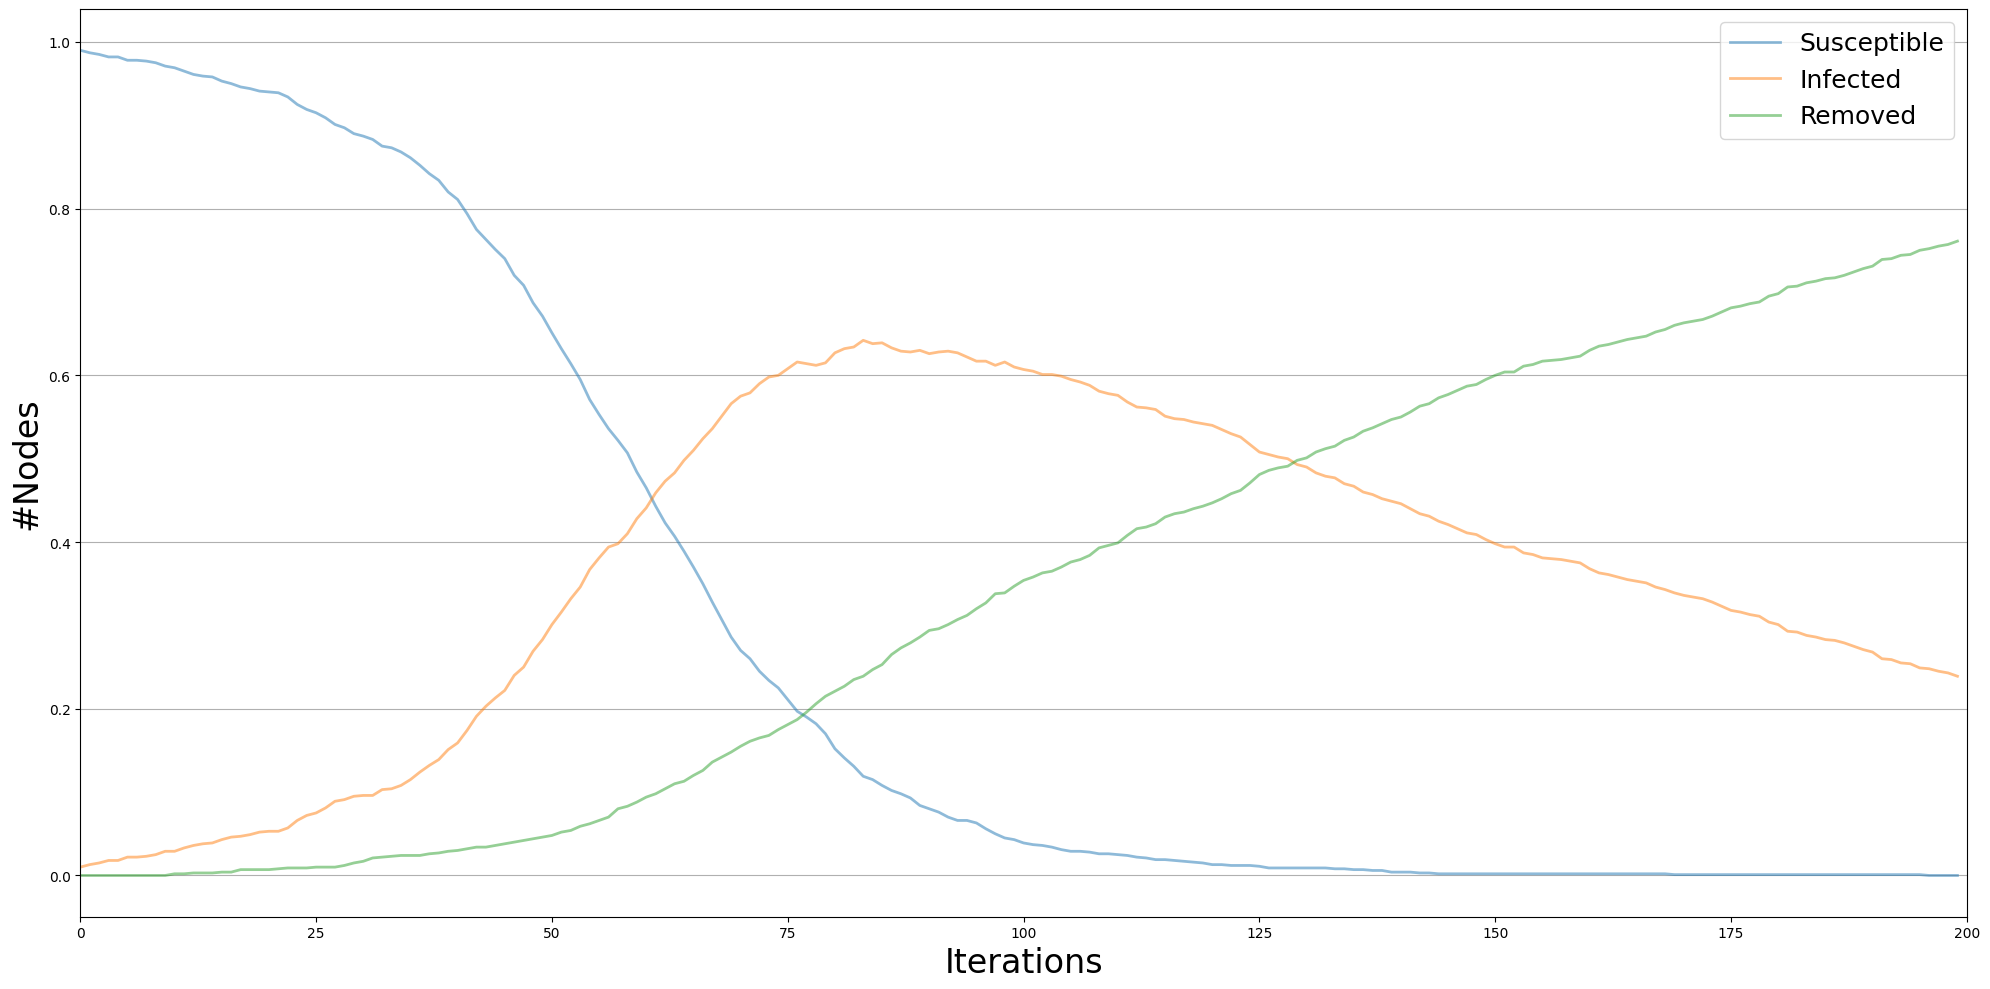

In [23]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)

viz.plot()

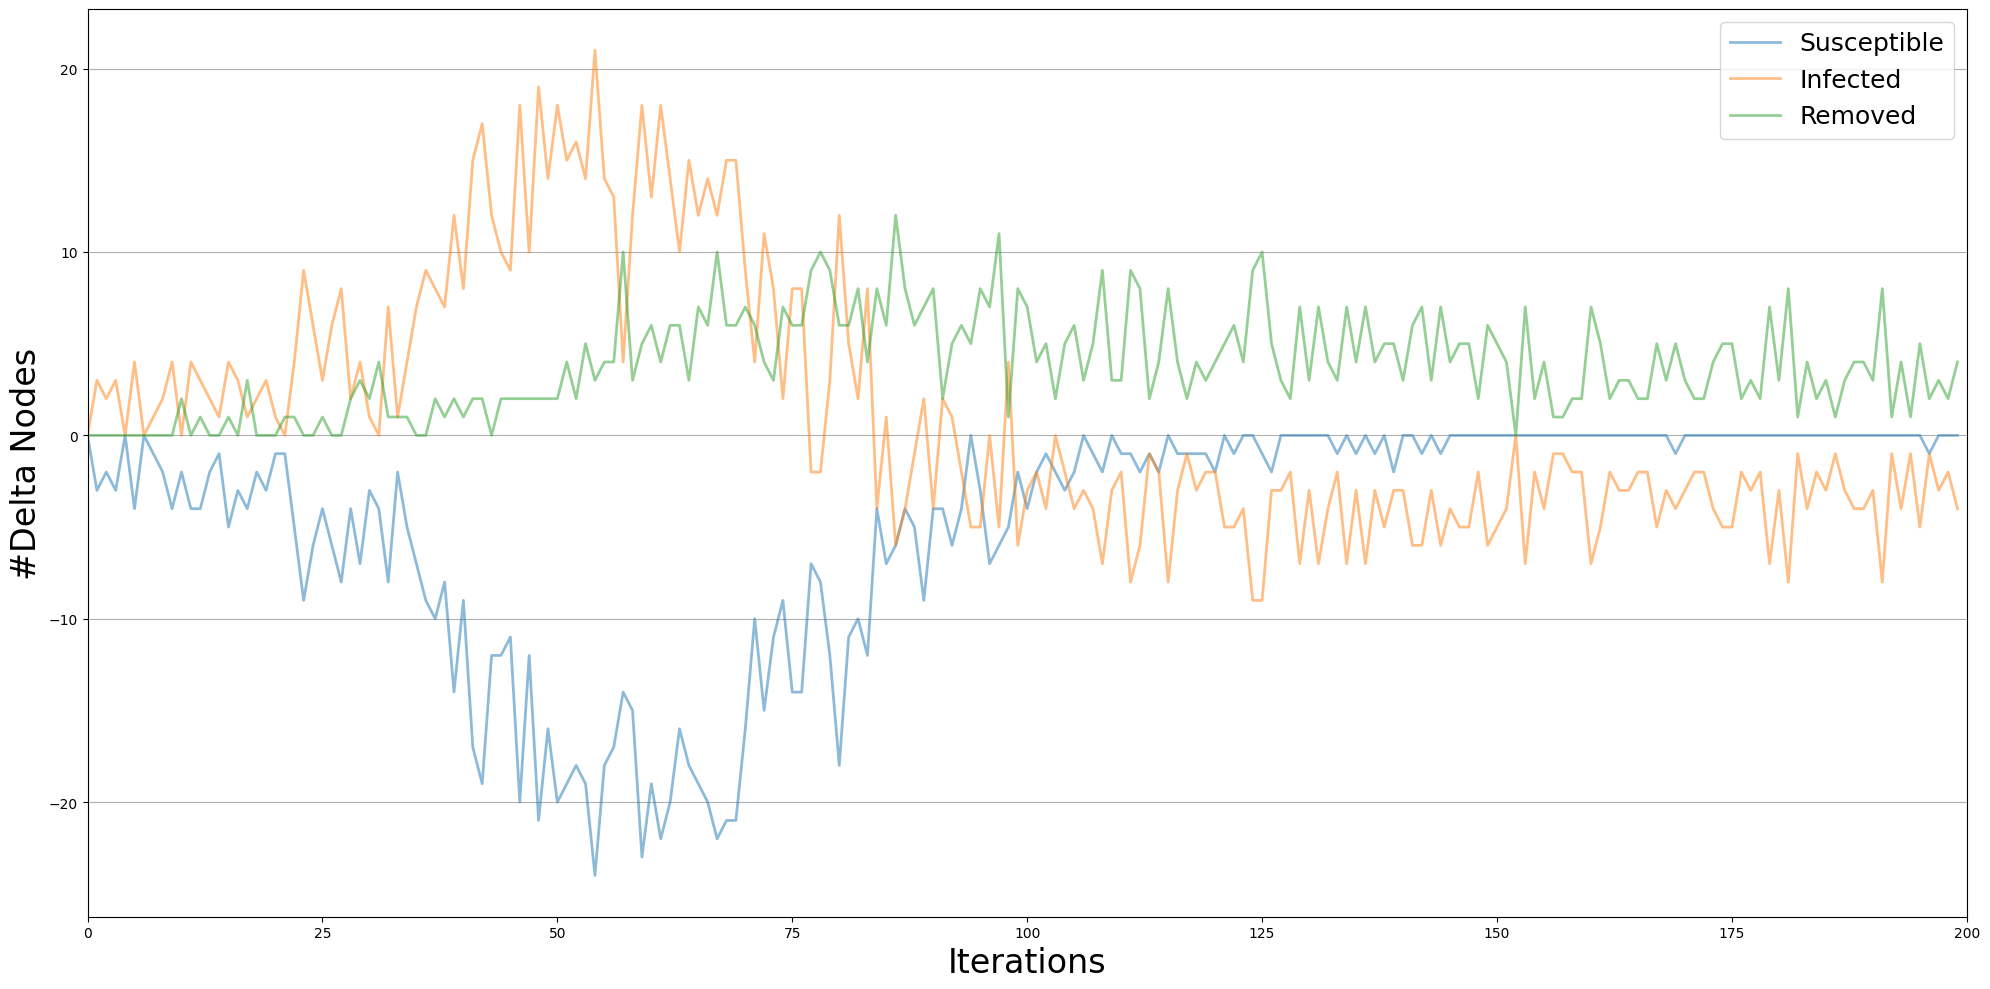

In [24]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()

{
  "model": {},
  "nodes": {},
  "edges": {
    "threshold": {
      "descr": "Edge threshold",
      "range": [
        0,
        1
      ],
      "optional": true,
      "default": 0.1
    }
  }
}


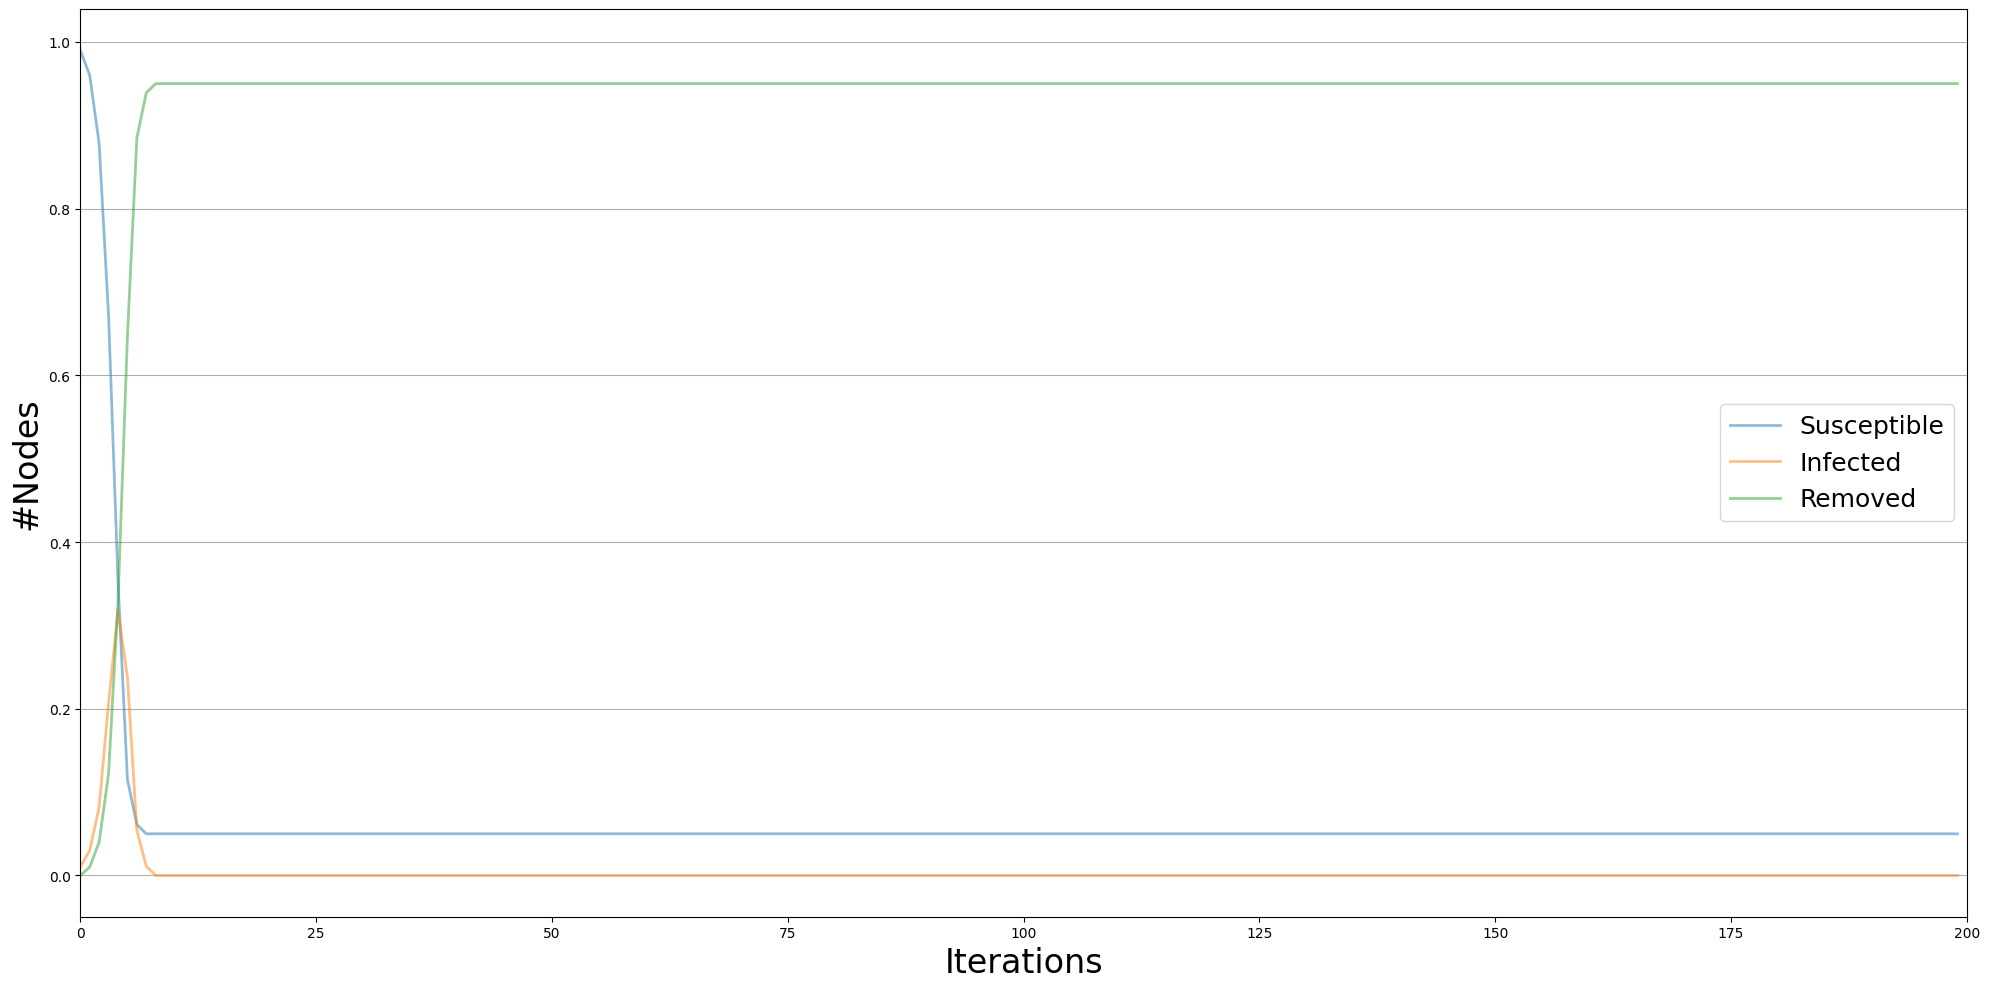

In [49]:
g = nx.erdos_renyi_graph(1000, 0.01)

# Model selection
model = ep.IndependentCascadesModel(g)
print(json.dumps(model.parameters, indent=2))
# Model Configuration
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.01)

# Setting the edge parameters
threshold = 0.3
for e in g.edges():
    config.add_edge_configuration("threshold", e, threshold)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
# print(type(viz))
viz.plot()

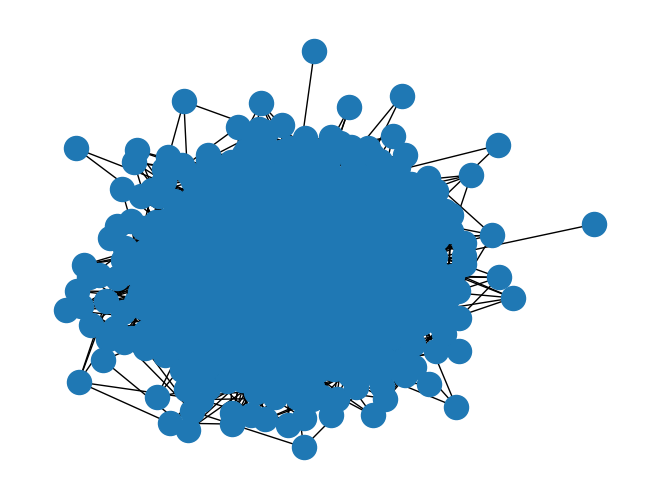

In [44]:
nx.draw(g)